In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [3]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code//annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file, delimiter=',')
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,chr1,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
1,chr1,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg
2,chr1,12487,12514,Bulge,1410,0,0,0,GGGTGGTAGGTGCAGAGACGGGAGGGG
3,chr1,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG
4,chr1,15949,15973,Bulge,687,0,0,0,GGAGCCGGGAGGTGGGGAACAGGG
...,...,...,...,...,...,...,...,...,...
732447,chrY,59362173,59362191,Canonical,370,0,0,0,gggcgggcgggctgaggg
732448,chrY,59362560,59362587,Canonical,9,0,0,0,gggtgagggtgagggttggggttgggg
732449,chrY,59362595,59363470,G-track,9,0,0,0,ggggttggggttggggttggggttggggttagggtttgggtttagg...
732450,chrY,59363480,59363508,Bulge,11,0,0,0,gggtgtgtgtgggtgtggtgtgtgtggg


In [4]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_sansN.csv')
reader_rd = pd.read_csv(file, delimiter=',')

In [6]:
reader_rd

,chr,start,end,type,distClosestG4,CGI,Ori,TSS
0,chr1,10525,10551,Bulge,918,NaN,NaN,NaN
1,chr1,11469,11503,Canonical,918,NaN,NaN,NaN
2,chr1,16111,16130,Bulge,2181,NaN,NaN,NaN
3,chr1,18311,18332,Bulge,2181,NaN,NaN,NaN
4,chr1,24560,24590,Bulge,2197,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
668029,chr21,48080453,48080472,GVBQ,13906,NaN,NaN,NaN
668030,chr21,48097556,48097580,Canonical,2272,NaN,NaN,NaN
668031,chr21,48099852,48099882,GVBQ,2272,NaN,NaN,NaN
668032,chr21,48113314,48113335,GVBQ,4140,NaN,NaN,NaN


### Analyse des données de mutations (cf Creation_des_fichiers_complets_de_mutation.ipynb)

In [7]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_1_sansN')
my_col = ['chr', 'pos', 'name', 'orig', 'mut', '%', 'PASS','INFOS', 'AA']
separateurs = "\t|AA="
reader2 = pd.read_csv(file2, sep = separateurs, names = my_col, header = None, engine ='python')
reader2 = reader2.drop_duplicates()
reader2 = reader2.reset_index(drop=True)

In [9]:
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP
...,...,...,...,...,...,...,...,...,...
46645,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP
46646,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP
46647,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP
46648,1,249218098,rs552245484,C,G,100,PASS,AC=7;AF=0.00139776;AN=5008;NS=2504;DP=19100;EA...,c|||;VT=SNP


In [8]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2 = pd.read_csv(file2)
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=23344;E...,t|||;VT=SNP,249214737,249214770,Bulge,1360,NaN,NaN,NaN,attattgatggacatttgggttggttccaagtc
44618,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44619,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44620,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,CAGCTACCAAGACAGC


On voit une diminution du nombre de lignes entre le fichier partiel et final : cela vient du fait que certaines lignes n'auraient pas dû apparaître, ne correspondant à aucun G4. Une brève analyse a permis de les éliminer.
On ne prendra donc en compte que le deuxième tableau.

In [10]:
list_chr = [str(i+1) for i in range (22)] + ['X']
nb_mutations_random = []
nb_mutations = []
nb_G4 = []
nb_G4_rd = []
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations_random.append(n)
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations.append(n)
    
    nb_G4.append(len(reader[reader['chr'] == f'chr{i}']))
    nb_G4_rd.append(len(reader_rd[reader_rd['chr'] == f'chr{i}']))
    

In [11]:
nb_G4

[57985,
 51559,
 37527,
 28636,
 33211,
 32185,
 36458,
 30036,
 28307,
 33091,
 38096,
 29974,
 12776,
 18215,
 18775,
 27700,
 33742,
 14031,
 33746,
 21120,
 6675,
 14075,
 28186]

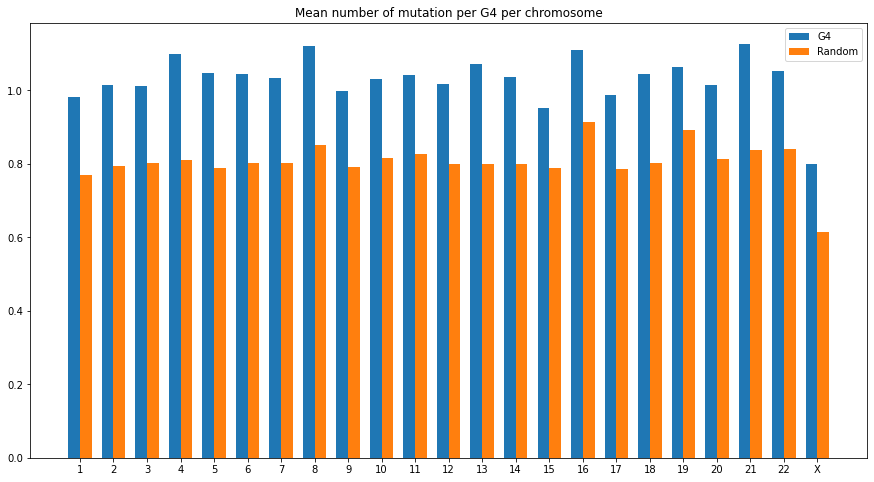

In [13]:
x = np.arange(len(nb_mutations))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, np.array(nb_mutations).astype(float)/np.array(nb_G4).astype(float), largeur)
r2 = ax.bar(x + largeur/2, np.array(nb_mutations_random).astype(float)/np.array(nb_G4_rd).astype(float), largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chr)

plt.legend(['G4', 'Random'])

plt.title('Mean number of mutation per G4 per chromosome')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig14.jpg')
plt.show()

In [14]:
list_chr = [str(i+1) for i in range (22)] + ['X']
nb_mutations_random = 0
nb_mutations = 0
nb_G4 = 0
nb_G4_rd = 0
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations_random += n
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations += n
    
    nb_G4 += len(reader[reader['chr'] == f'chr{i}'])
    nb_G4_rd += len(reader_rd[reader_rd['chr'] == f'chr{i}'])

<ipython-input-17-855b8947f908>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


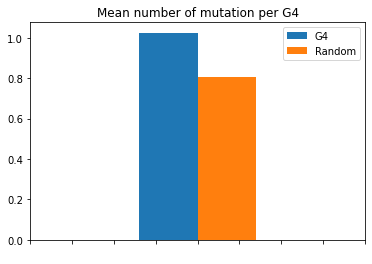

In [17]:
x = 0
largeur = .35

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, nb_mutations/nb_G4, largeur)
r2 = ax.bar(x + largeur/2, nb_mutations_random/nb_G4_rd, largeur)

ax.set_xticklabels(' ')

plt.legend(['G4', 'Random'])
plt.xlim(-1,1)

plt.title('Mean number of mutation per G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig16.jpg')
plt.show()

### Etude primitive des données

##### Stat des mutations

In [29]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader = pd.read_csv(file, delimiter=',')
reader = reader[reader['chr'] == 'chr1']
reader[5:15]

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
5,chr1,26787,26806,Bulge,2197,NaN,NaN,NaN,ctcggccgggcgcagcggc
6,chr1,39044,39069,GVBQ,3039,NaN,NaN,NaN,gataaaactacttggctgcaaacac
7,chr1,42108,42132,Bulge,3039,NaN,NaN,NaN,catgtcaagggctgaacatctatg
8,chr1,50830,50851,GVBQ,3203,NaN,NaN,NaN,TTACTGGACTTGTCAACAAAC
9,chr1,54054,54076,GVBQ,708,NaN,NaN,NaN,ATTCTAAATAGATGTGTAGAAA
10,chr1,54784,54812,Bulge,708,NaN,NaN,NaN,tttccttttctttctttcattctttctt
11,chr1,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
12,chr1,64196,64219,GVBQ,1147,NaN,NaN,NaN,ATCAGTATTTTTATGCTGATAAT
13,chr1,65366,65393,Bulge,1147,NaN,NaN,NaN,CTTGTGAGACTATAAAAGTTAGTCTCA
14,chr1,68112,68149,Bulge,207,NaN,NaN,NaN,agatgtggccgtaagactgaaatcacttaggtgactt


In [30]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')
reader2['length'] = reader2['end'] - reader2['start'] + 1
reader2

,Unnamed: 0,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,length
0,0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,27
1,1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,27
2,2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,20
3,3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,28
4,4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46645,46645,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,40
46646,46646,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,40
46647,46647,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,17
46648,46648,1,249218098,rs552245484,C,G,100,PASS,AC=7;AF=0.00139776;AN=5008;NS=2504;DP=19100;EA...,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,17


In [31]:
cluster2 = reader2[reader2['distClosestG4'] <= 100]
cluster2 = cluster2[['start','end','type']]
cluster2 = cluster2.drop_duplicates()
cluster2 = cluster2.reset_index(drop=True)

cluster = reader[reader['distClosestG4'] <= 100]

In [32]:
nb_cluster = len(cluster2)
nb_cluster_i = len(cluster)
print("nb de G4 mutés en cluster : ",  nb_cluster)
print("Taux de G4 mutés en cluster : ", nb_cluster/len(reader2)*100, "%") #mutés en cluster / mutés
print("Taux de G4 en cluster : ", len(cluster)/len(reader)*100, "%") #cluster/total

nb de G4 mutés en cluster :  1555
Taux de G4 mutés en cluster :  3.3333333333333335 %
Taux de G4 en cluster :  5.159955160817453 %


In [33]:
G4_mutated = reader2[['start','end','type']]
G4_mutated = G4_mutated.drop_duplicates()

In [34]:
nb_clust_i = len(reader[reader['distClosestG4'] <= 100])
print("Taux de G4 en cluster ayant muté :", nb_cluster/nb_clust_i*100, "%")
print("Taux de G4 ayant muté :", len(G4_mutated)/len(reader)*100, "%") # nb G4 mutés/nb G4

Taux de G4 en cluster ayant muté : 51.971925133689844 %
Taux de G4 ayant muté : 53.30688971285677 %


In [35]:
print("Nombre de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100]))
print("Nombre de mutations : ", len(reader2))
print("Rapport des mutations en cluster sur le total des mutations :", len(reader2[reader2['distClosestG4'] <= 100])/len(reader2) )
print("Taux de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100])/ reader2[reader2['distClosestG4'] <= 100]['length'].sum()*100, "%")
print("Taux de mutations non clusterisées : ", len(reader2[reader2['distClosestG4'] > 100])/ reader2[reader2['distClosestG4'] > 100]['length'].sum()*100, "%")

Nombre de mutations en cluster :  2362
Nombre de mutations :  46650
Rapport des mutations en cluster sur le total des mutations : 0.050632368703108256
Taux de mutations en cluster :  3.6035211375043863 %
Taux de mutations non clusterisées :  3.5781603595611644 %


Pour les G4 dans le génome référencé, on avait :

In [36]:
print("Nombre de mutations en cluster :  15915")
print("Nombre de mutations :  65966")
print("Rapport des mutations en cluster sur le total des mutations :", 15915/65966)
print("Taux de mutations en cluster :  3.2858809319803033 %")
print("Taux de mutations non clusterisées :  3.6378609078407598 %")

Nombre de mutations en cluster :  15915
Nombre de mutations :  65966
Rapport des mutations en cluster sur le total des mutations : 0.2412606494254616
Taux de mutations en cluster :  3.2858809319803033 %
Taux de mutations non clusterisées :  3.6378609078407598 %


Les résultats sont assez étranges : on observe moins de G4 mutés dans un tirage aléatoire que dans le génome avéré : 48% contre 59%. Les G4 seraient donc plus soumis à la mutation que le reste du génome. A creuser...

### Analyse des nucléotides dans le chr1

In [118]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader_rd = pd.read_csv(file, delimiter=',')
reader_rd = reader_rd[reader_rd['chr'] == 'chr1']

file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2_rd = pd.read_csv(file2, delimiter=',')

In [119]:
freq = list(reader2_rd['INFOS'].str.split(";"))
freq = pd.DataFrame(freq)
a = list(freq[1].str.split("="))
b = [(x[1]) for x in a]
freq2 = pd.DataFrame(b)
reader2_rd_f = reader2_rd
reader2_rd_f['INFOS'] = freq2

In [120]:
reader2_rd

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,10539,rs537182016,C,A,100,PASS,0.000599042,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,1,10542,rs572818783,C,T,100,PASS,0.000199681,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
2,1,16127,rs544021564,C,A,100,PASS,0.000599042,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,1,58812,rs557388690,C,T,100,PASS,0.000199681,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
4,1,58814,rs114420996,G,A,100,PASS,0.109026,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,0.000599042,t|||;VT=SNP,249214737,249214770,Bulge,1360,NaN,NaN,NaN,attattgatggacatttgggttggttccaagtc
44618,1,249216443,rs560632912,A,T,100,PASS,0.000199681,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44619,1,249216456,rs572451011,C,A,100,PASS,0.000199681,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44620,1,249218097,rs537073360,C,T,100,PASS,0.000199681,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,CAGCTACCAAGACAGC


In [83]:
a = ['',1]
b = [2,3]
np.array([a,b])

array([[0, 1],
       [2, 3]])

In [39]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_.bed')
reader = pd.read_csv(file, delimiter='\t')
reader = reader[reader['chr'] == 'chr1']

file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')

In [40]:
count_mut = reader2[['orig','mut']]
count_mut['number'] = 1

<ipython-input-40-4f50bcf5cee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = 1


In [41]:
count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
count_orig = count_orig.reset_index()

In [42]:
nb_G_G4 = 356722 + 688558
nb_C_G4 = 133607 + 113318
nb_A_G4 = 168955 + 89886
nb_T_G4 = 135713 + 62185
#chiffres trouvés après analyse bash des fichiers 

In [43]:
taux_G = float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
taux_C = float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
taux_A = float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
taux_T = float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)

In [44]:
count_mut_rd = reader2_rd[['orig','mut']]
count_mut_rd['number'] = 1

<ipython-input-44-2548b0987d58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut_rd['number'] = 1


In [45]:
count_orig_rd = count_mut_rd[['orig','number']].groupby(['orig']).sum()
count_orig_rd = count_orig_rd.reset_index()

In [46]:
count_orig_rd[count_orig_rd['orig'] == 'G']

,orig,number
191,G,12666


In [47]:
nb_G_G4_rd = 152407 + 157113
nb_C_G4_rd = 222141 + 152001
nb_A_G4_rd = 213770 + 219015
nb_T_G4_rd = 214190 + 218223
#chiffres trouvés après analyse bash du fichier

 grep -o "G" FILE | wc -l

In [48]:
taux_G_rd = float(count_orig_rd[count_orig_rd['orig'] == 'G']['number'] / nb_G_G4_rd)
taux_C_rd = float(count_orig_rd[count_orig_rd['orig'] == 'C']['number'] / nb_C_G4_rd)
taux_A_rd = float(count_orig_rd[count_orig_rd['orig'] == 'A']['number'] / nb_A_G4_rd)
taux_T_rd = float(count_orig_rd[count_orig_rd['orig'] == 'T']['number'] / nb_T_G4_rd)

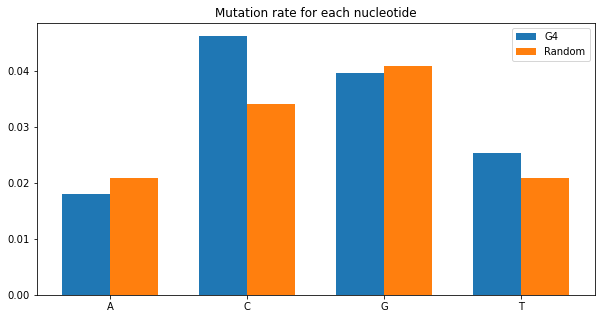

In [49]:
largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(4)])


r1 = ax.bar(x - largeur/2, [taux_A,taux_C,taux_G,taux_T], largeur)
r2 = ax.bar(x + largeur/2, [taux_A_rd, taux_C_rd, taux_G_rd, taux_T_rd], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4', 'Random'])

plt.title('Mutation rate for each nucleotide')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig15.jpg')
plt.show()

### Analyse des nucléotides dans l'ensemble des chr

In [28]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader_rd = pd.read_csv(file, delimiter=',')

file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file)

In [31]:
nb_G_G4 = 11779730
nb_C_G4 = 2763947
nb_A_G4 = 2913392
nb_T_G4 = 2231649
#chiffres trouvés après analyse bash des fichiers 

In [32]:
nb_G_G4_rd = 3550452
nb_C_G4_rd = 4214934
nb_A_G4_rd = 4979202
nb_T_G4_rd = 4984350
#chiffres trouvés après analyse bash des fichiers

In [33]:
file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_2_final.csv')
reader2_rd = pd.read_csv(file2, delimiter=',')
reader2_rd = reader2_rd.drop('Unnamed: 0',axis =1)
reader2_rd.drop([1,3], axis = 0)

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS
0,2,12385,esv3589586,G,<CN0>,100,PASS,"AC=3;AF=0.000599042;AN=5008;CIEND=0,500;CIPOS=...",NaN,15937,15965,Canonical,7007,NaN,NaN,NaN
2,2,15953,rs11896882,G,A,100,PASS,AC=92;AF=0.0183706;AN=5008;NS=2504;DP=20037;EA...,.|||;VT=SNP,15937,15965,Canonical,7007,NaN,NaN,NaN
4,2,23163,esv3589587,C,<CN2>,100,PASS,AC=3;AF=0.000599042;AN=5008;CS=DUP_gs;END=9961...,NaN,39121,39146,Bulge,2013,NaN,NaN,NaN
5,2,41177,rs568687781,A,G,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19635;E...,.|||;VT=SNP,41159,41188,GVBQ,2013,NaN,NaN,NaN
6,2,41187,rs80074258,T,C,100,PASS,AC=27;AF=0.00539137;AN=5008;NS=2504;DP=19906;E...,.|||;VT=SNP,41159,41188,GVBQ,2013,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43360,2,243073393,rs569948112,CTTA,C,100,PASS,AC=10;AF=0.00199681;AN=5008;NS=2504;DP=22705;E...,NaN,243073363,243073397,GVBQ,9006,NaN,NaN,NaN
43361,2,243082431,rs562870785,G,A,100,PASS,AC=6;AF=0.00119808;AN=5008;NS=2504;DP=18025;EA...,.|||;VT=SNP,243082403,243082434,Canonical,6682,NaN,NaN,NaN
43362,2,243164875,rs375360405,CAA,C,100,PASS,AC=17;AF=0.00339457;AN=5008;NS=2504;DP=15600;E...,NaN,243164877,243164895,GVBQ,2900,NaN,NaN,NaN
43363,2,243177577,rs530860990,CTCTT,C,100,PASS,AC=6;AF=0.00119808;AN=5008;NS=2504;DP=19162;EA...,NaN,243177560,243177581,Bulge,65,NaN,NaN,NaN


 grep -o -i "G" * | wc -l

In [34]:
list_chr = [str(i+1) for i in range (22)] + ['X']

taux_G = 0
taux_C = 0
taux_T = 0
taux_A = 0

taux_G_rd = 0
taux_C_rd = 0
taux_T_rd = 0
taux_A_rd = 0

for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2, delimiter=',')
    
    count_mut = reader2[['orig','mut']]
    count_mut['number'] = 1
    count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
    count_orig = count_orig.reset_index()
    
    taux_G += float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
    taux_C += float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
    taux_A += float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
    taux_T += float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)
    
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2_rd = pd.read_csv(file2, delimiter=',')
    
    count_mut_rd = reader2_rd[['orig','mut']]
    count_mut_rd['number'] = 1
    count_orig_rd = count_mut_rd[['orig','number']].groupby(['orig']).sum()
    count_orig_rd = count_orig_rd.reset_index()
    
    taux_G_rd += float(count_orig_rd[count_orig_rd['orig'] == 'G']['number'] / nb_G_G4_rd)
    taux_C_rd += float(count_orig_rd[count_orig_rd['orig'] == 'C']['number'] / nb_C_G4_rd)
    taux_A_rd += float(count_orig_rd[count_orig_rd['orig'] == 'A']['number'] / nb_A_G4_rd)
    taux_T_rd += float(count_orig_rd[count_orig_rd['orig'] == 'T']['number'] / nb_T_G4_rd)

<ipython-input-34-cc570af3e91e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = 1
<ipython-input-34-cc570af3e91e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut_rd['number'] = 1


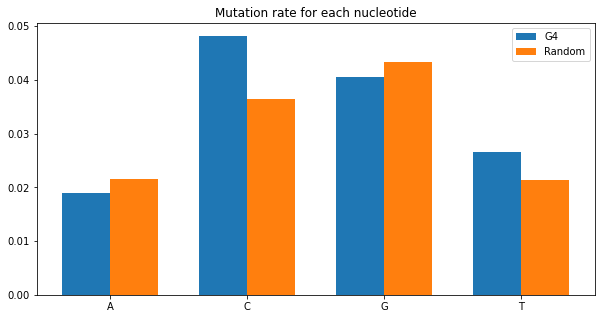

In [35]:
largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(4)])


r1 = ax.bar(x - largeur/2, [taux_A,taux_C,taux_G,taux_T], largeur)
r2 = ax.bar(x + largeur/2, [taux_A_rd, taux_C_rd, taux_G_rd, taux_T_rd], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4', 'Random'])

plt.title('Mutation rate for each nucleotide')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig15.jpg')
plt.show()

### Etude en prenant en compte les fréquences

#### Création d'une colonne recensant les fréquences

In [40]:
file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,11008,rs575272151,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2232;EA...,.|||;VT=SNP,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
1,1,11012,rs544419019,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2090;EA...,.|||;VT=SNP,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
2,1,11063,rs561109771,T,G,100,PASS,AC=15;AF=0.00299521;AN=5008;NS=2504;DP=2834;EA...,.|||;VT=SNP,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg
3,1,14674,rs561913721,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=26402;E...,g|||;VT=SNP;EX_TARGET,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG
4,1,16738,rs549612027,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=16499;E...,g|||;VT=SNP,16707,16739,Bulge,20,0,0,0,GGAGCtgggggtggtggtgggggcggtggggg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64158,1,249240217,rs570135855;rs556759920,G,"GT,T",100,PASS,"AC=368,183;AF=0.0734824,0.0365415;AN=5008;NS=2...",NaN,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...
64159,1,249240219,rs370070114,A,T,100,PASS,AC=1454;AF=0.290335;AN=5008;NS=2504;DP=149437;...,.|||;VT=SNP,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...
64160,1,249240537,rs549505823,GGT,G,100,PASS,AC=2272;AF=0.453674;AN=5008;NS=2504;DP=66563;E...,NaN,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...
64161,1,249240539,rs545682552,T,G,100,PASS,AC=1682;AF=0.335863;AN=5008;NS=2504;DP=56555;E...,.|||;VT=SNP,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...


In [41]:
a = reader2["INFOS"].str.split(";").to_list()

In [42]:
liste_AF = [b[1][3:] for b in a]

In [43]:
reader2["AF"] = liste_AF
reader2[reader2["mut"].str.contains(",")]

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence,AF
34,1,720968,rs184456771,G,"C,T",100,PASS,"AC=20,11;AF=0.00399361,0.00219649;AN=5008;NS=2...",.|||;VT=SNP;MULTI_ALLELIC,720954,720976,Canonical,4465,0,0,0,ggggtagggggaggggggaggg,"0.00399361,0.00219649"
65,1,789922,rs143149010,C,"A,T",100,PASS,"AC=16,26;AF=0.00319489,0.00519169;AN=5008;NS=2...",.|||;VT=SNP;MULTI_ALLELIC,789904,789948,Bulge,1284,0,0,0,GGGAACCAGAGGAGCTACGAAGGGAGGCAGTGGGGACTGGTGGG,"0.00319489,0.00519169"
276,1,900953,rs115880359,C,"A,T",100,PASS,"AC=47,6;AF=0.00938498,0.00119808;AN=5008;NS=25...",C|||;VT=SNP;MULTI_ALLELIC,900945,900966,Canonical,189,1,1,1,GGGGTCCCGGGAAGGGTGGGG,"0.00938498,0.00119808"
402,1,956061,rs199682825,A,"AGGGGGGGG,AGGGGGGGGG",100,PASS,"AC=1430,10;AF=0.285543,0.00199681;AN=5008;NS=2...",NaN,956049,956068,Canonical,10,1,0,1,GGGGCCTGGGGAGGGGGGG,"0.285543,0.00199681"
522,1,985699,rs145111679,C,"A,T",100,PASS,"AC=2,11;AF=0.000399361,0.00219649;AN=5008;NS=2...",C|||;VT=SNP;MULTI_ALLELIC;EX_TARGET,985699,985737,Bulge,237,0,2,0,GGGACCTGGGGTCGGTGGGGCAGGAGCAGGGGGAAGGG,"0.000399361,0.00219649"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63778,1,247010054,rs553271709;rs531191952,T,"G,TG",100,PASS,"AC=8,19;AF=0.00159744,0.00379393;AN=5008;NS=25...",NaN,247010054,247010077,Bulge,1849,0,0,0,GGGGGGATGGGGGTGGGGAGGTg,"0.00159744,0.00379393"
63796,1,247166094,rs535223876;rs568264055,AG,"AGG,A",100,PASS,"AC=89,24;AF=0.0177716,0.00479233;AN=5008;NS=25...",NaN,247166094,247166121,GVBQ,4816,0,0,0,GGGGGGGGCAgcaaaggacttgaaggg,"0.0177716,0.00479233"
64071,1,248744177,rs181454473,G,"C,T",100,PASS,"AC=9,9;AF=0.00179712,0.00179712;AN=5008;NS=250...",g|||;VT=SNP;MULTI_ALLELIC,248744162,248744200,Canonical,10438,0,0,0,gggaagggtactgggggggggtgaaggggtaggtgggg,"0.00179712,0.00179712"
64157,1,249240214,rs527602186;rs535261737,A,"AG,G",100,PASS,"AC=8,101;AF=0.00159744,0.0201677;AN=5008;NS=25...",NaN,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...,"0.00159744,0.0201677"


In [44]:
n = 0
liste = []
for index, row in reader2[reader2["mut"].str.contains(",")].iterrows():
    mut = row["mut"].split(",")
    AF = row["AF"].split(",")
    mut1 = row
    mut2 = row
    mut1["mut"] = mut[0]
    mut2["mut"] = mut[1]
    mut1["AF"] = float(AF[0])
    mut2["AF"] = float(AF[1])
    n += 1
    
    liste.append(mut1)
    liste.append(mut2)
    
    if n % 100 == 0:
        print(n)

reader2 = reader2[~reader2["mut"].str.contains(",")].append(liste)
reader2 = reader2.drop_duplicates()

100
200
300
400
500
600


In [51]:
n = len(reader2[reader2["AF"].astype(float) > 0.5])
b = list([1]*n - reader2[reader2["AF"].astype(float) > 0.5]["AF"].astype(float))
index = reader2[reader2["AF"].astype(float) > 0.5]["AF"].index.tolist()
reader2["AF"].loc[index] = b

In [55]:
reader2["INFOS"][0]

'AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2232;EAS_AF=0.0367;AMR_AF=0.0965;AFR_AF=0.1346;EUR_AF=0.0885;SAS_AF=0.0716;'

Le procédé pas à pas étant efficace, on compile tout sous une unique fonction pour pouvoir l'appliquer à l'ensemble des chromosomes.

In [65]:
def column_AF(reader2):
    a = reader2["INFOS"].str.split(";").to_list()
    liste_AF = [b[1][3:] for b in a]
    reader2["AF"] = liste_AF
    reader2[reader2["mut"].str.contains(",")]
    
    n = 0
    liste = []
    for index, row in reader2[reader2["mut"].str.contains(",")].iterrows():
        mut = row["mut"].split(",")
        AF = row["AF"].split(",")
        mut1 = row
        mut2 = row
        mut1["mut"] = mut[0]
        mut2["mut"] = mut[1]
        mut1["AF"] = float(AF[0])
        mut2["AF"] = float(AF[1])
        n += 1

        liste.append(mut1)
        liste.append(mut2)

    reader2 = reader2[~reader2["mut"].str.contains(",")].append(liste)
    reader2 = reader2.drop_duplicates()
    
    n = len(reader2[reader2["AF"].astype(float) > 0.5])
    b = list([1]*n - reader2[reader2["AF"].astype(float) > 0.5]["AF"].astype(float))
    index = reader2[reader2["AF"].astype(float) > 0.5]["AF"].index.tolist()
    reader2["AF"].loc[index] = b
    return reader2

    
def select_AF_freq(reader2):
    return reader2[reader2["AF"].astype(float) > 0.1]

def select_AF_rare(reader2):
    return reader2[reader2["AF"].astype(float) < 0.01]

def select_AF_reste(reader2):
    a = reader2[reader2["AF"].astype(float) >= 0.01]
    a = a[a["AF"].astype(float) <= 0.1]
    return a

On reprend maintenant les analyses sur les nucléotides en prenant en compte les fréquences de mutations.

In [92]:
list_chr = [str(i+1) for i in range (22)] + ['X']

isole = [0,0,0]
cluster = [0,0,0]
rd = [0,0,0]

n_is = 0
n_clus = 0
n_rd = 0


for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2, delimiter=',')
    reader2["length"] = reader2["end"] - reader2["start"]
    
    reader_AF = column_AF(reader2)
    AF_freq = select_AF_freq(reader_AF)
    AF_rare = select_AF_rare(reader_AF)
    AF_reste = select_AF_reste(reader_AF)
    
    cluster[0] += len(AF_freq[AF_freq["distClosestG4"] < 100])
    isole[0] += len(AF_freq[AF_freq["distClosestG4"] >= 100])
    cluster[1] += len(AF_rare[AF_rare["distClosestG4"] < 100])
    isole[1] += len(AF_rare[AF_rare["distClosestG4"] >= 100])
    
    isole[2] += len(AF_reste[AF_reste["distClosestG4"] >= 100])
    cluster[2] += len(AF_reste[AF_reste["distClosestG4"] < 100])


    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2_rd = pd.read_csv(file2, delimiter=',')
    reader2_rd["length"] = reader2_rd["end"] - reader2_rd["start"]
    
    reader_rd_AF = column_AF(reader2_rd)
    AF_freq_rd = select_AF_freq(reader_rd_AF)
    AF_rare_rd = select_AF_rare(reader_rd_AF)
    AF_reste_rd = select_AF_reste(reader_rd_AF)
    rd[0] += len(AF_freq_rd)
    rd[1] += len(AF_rare_rd)
    rd[2] += len(AF_reste_rd)
    


In [97]:
file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file)
reader["length"] = reader["end"] - reader["start"]
n_clus = reader[reader["distClosestG4"] < 100]["length"].sum()
n_is = reader[reader["distClosestG4"] >= 100]["length"].sum()

In [98]:
file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader = pd.read_csv(file)
reader["length"] = reader["end"] - reader["start"]
n_rd = reader["length"].sum()

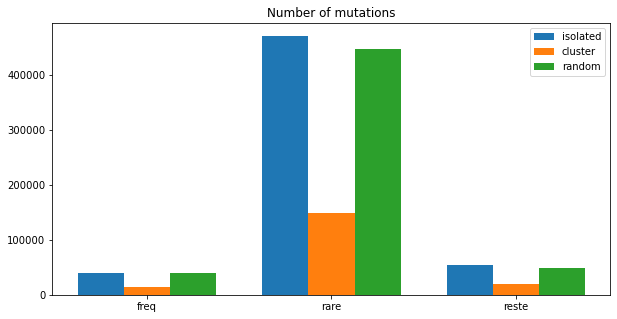

In [68]:
largeur = .25
labels = ['freq', 'rare', 'reste']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(3)])


r1 = ax.bar(x - largeur, isole, largeur)
r2 = ax.bar(x, cluster, largeur)
r3 = ax.bar(x + largeur, rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['isolated', 'cluster', 'random'])

plt.title('Number of mutations')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig17.jpg')
plt.show()

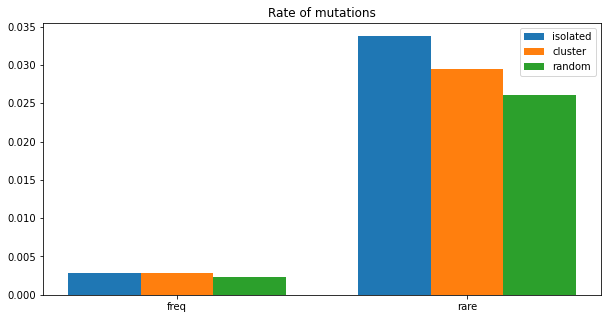

In [106]:
largeur = .25
labels = ['freq', 'rare']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(2)])


r1 = ax.bar(x - largeur, np.array(isole[:2])/n_is, largeur)
r2 = ax.bar(x, np.array(cluster[:2])/n_clus, largeur)
r3 = ax.bar(x + largeur, np.array(rd[:2])/n_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['isolated', 'cluster', 'random'])

plt.title('Rate of mutations')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig17.jpg')
plt.show()

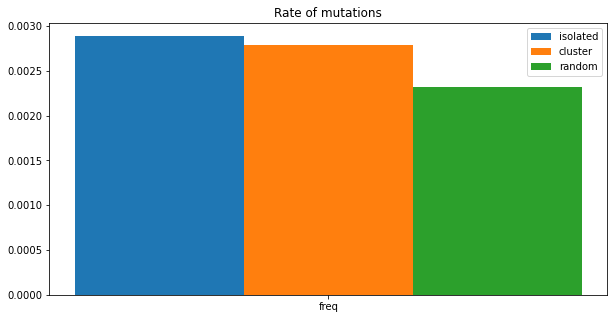

In [107]:
largeur = .25
labels = ['freq']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(1)])


r1 = ax.bar(x - largeur, np.array(isole[:1])/n_is, largeur)
r2 = ax.bar(x, np.array(cluster[:1])/n_clus, largeur)
r3 = ax.bar(x + largeur, np.array(rd[:1])/n_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['isolated', 'cluster', 'random'])

plt.title('Rate of mutations')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig18.jpg')
plt.show()

In [82]:
rd = [0]*3
n_rd = 0

for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2_rd = pd.read_csv(file2, delimiter=',')

    reader_rd_AF = column_AF(reader2_rd)
    AF_freq_rd = select_AF_freq(reader_rd_AF)
    AF_rare_rd = select_AF_rare(reader_rd_AF)
    AF_reste_rd = select_AF_reste(reader_rd_AF)
    rd[0] += len(AF_freq_rd)
    rd[1] += len(AF_rare_rd)
    rd[2] += len(AF_reste_rd)

    n_rd += len(reader_rd_AF)

In [83]:
rd

[39710, 446389, 49171]

In [84]:
n_rd

535270

In [85]:
rd[0]+rd[1]+rd[2]

535270

In [86]:
np.array(rd)/n_rd

array([0.07418686, 0.83395109, 0.09186205])